## Shannon Fano Algorithm
Wikipedia : https://en.wikipedia.org/wiki/Shannon%E2%80%93Fano_coding

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [138]:
fig_size = (10,7)

plt.rcParams["figure.figsize"] = fig_size

In [150]:
"""
@author: m_ashour
"""
import math
import matplotlib.pyplot as plt
# import numpy as np
class ShanonFanno(object):

    def __init__(self, s):
        self.sentence = s
        self.total = len(s)
        self.sum_logs_with_pis = 0
        self.size_after_compress = 0
        self.sorted_s = ""
        self.char_dict = dict()

    def devide_chars(self, x, itr, code):
        '''makes the tree recursively'''
        if len(x) == 2 : return [[x[0], itr + 1, code + "0"], [x[1], itr + 1, code + "1"]]
        if len(x) == 1 : return [[x, itr, code]]
        index = self.break_the_node(x)
        return [self.devide_chars(x[:index+1], itr + 1, code + "0"), self.devide_chars(x[index+1:], itr + 1, code + "1")]

    def make_count(self):
        '''returns a dict of chars with counts + string with sorted chars by appearence'''
        # making list of tuples to sort it according to the count
        char_ls = [(self.sentence.count(i), i) for i in set(self.sentence)]
        char_ls.sort(reverse=True)
        #making a dict of key and value
        self.char_dict = dict([(i[1], i[0]) for i in char_ls])
        sorted_s = ""
        for i in char_ls :
            sorted_s += i[1]

        return self.char_dict, sorted_s

    def flatten_the_tree(self, tree):
            '''flatten the tree and calculate the pi, log(pi), sum(log(pi) * pi)'''
            leaf = False
            flat_list = []
            if len(tree) == 1 : tree = tree[0]
            while(leaf == False):


                if type(tree[-1]) is not list:
                    #print(tree)
                    #just in case data missed up
                    if len(tree) != 3 : break
                    #reaching the leaf and computing pi
                    leaf = True
                    pi = self.sentence.count(tree[0])/self.total
                    log_pi = math.log(1/pi, 2)
                    x = tree.copy()
                    x.append(pi)
                    self.sum_logs_with_pis += pi * log_pi
                    return [x]
                else:
                    # going recursively in the right and the left

                    flat_right = []
                    flat_left = []
                    flat_right.extend(self.flatten_the_tree(tree[0]))
                    flat_left.extend(self.flatten_the_tree(tree[1]))
                    flat_list.extend(flat_right)
                    flat_list.extend(flat_left)
                    return flat_list




    def break_the_node(self, node):
        total = 0
        for i in node :
            total += self.char_dict[i]
        length = len(node)
        count = 0
        last_char_index = 0
        for i in range(length//2):
            count += self.char_dict[self.sorted_s[i]]
            if (count - (total/2) >= 0):
                last_char_index = i +1
                break
        return last_char_index

    def plot_bar(self):
        x_labels = list(map(lambda x : x[0], self.final_flat))
        y = list(map(lambda x : x[1], self.final_flat))
        plt.bar(range(len(y)), y, align='center', alpha=0.5)
        plt.xticks(range(len(y)), x_labels)
        plt.ylabel('recurrence')
        plt.title('Chars in the sentence')
        plt.show()
        
    def plot_pie(self):
        x_labels = list(map(lambda x : x[0], self.final_flat))
        y = list(map(lambda x : x[1], self.final_flat))
        plt.pie(y, labels=x_labels, autopct='%1.1f%%',  startangle=90)
        plt.show()

    def do_the_work(self):
        '''here the work '''
        self.char_dict, self.sorted_s = self.make_count()
        # generate the nodes by spliting the original one
        last_char_index = self.break_the_node(self.sorted_s)
        left = self.sorted_s[:last_char_index]
        right = self.sorted_s[last_char_index:]
        #making the tree
        left_tree = self.devide_chars(left, 1, "0")
        right_tree = self.devide_chars(right, 1, "1")

        #computing the pi and flatten the tree to make it easy to compute
        left_flat = self.flatten_the_tree(left_tree)
        right_flat = self.flatten_the_tree(right_tree)
        self.final_flat = []
        self.final_flat.extend(left_flat)
        self.final_flat.extend(right_flat)
        self.write_final_logs(self.final_flat)

    def write_final_logs(self, final_flat):
        '''here is the final logs'''
        b1 = 0
        for i in final_flat :
                count = self.sentence.count(i[0])
                b1 += count*i[1]
                print("Symbol: {0} => [Pi: {1}], [Code: {2}], [Freq.: {3}], [No. of Bits: {4}]".format(i[0],i[-1],i[2],count,i[1]*count))
        b0 = len(self.sentence)*8
        print("B0: {0}".format(b0))
        print("B1: {0}".format(b1))
        print("Compression Ratio: {0}".format(b0/b1))
        print("Ideal Entropy: {0}".format(self.sum_logs_with_pis))
        print("Algo Entropy: {0}".format(b1/self.total))

In [151]:
s1 = "Soon, you will be a graduated engineer. Work hard and prove yourself! Good luck!"
s2 = "THE ESSENTIAL FEATURE"
sh = ShanonFanno(s2)
sh.do_the_work()


['E', 4, '0000']
['T', 4, '0001']
['S', 3, '001']
['A', 2, '01']
[' ', 3, '100']
['U', 3, '101']
['R', 4, '1100']
['N', 4, '1101']
['L', 5, '11100']
['I', 5, '11101']
['H', 5, '11110']
['F', 5, '11111']
Symbol: E => [Pi: 0.23809523809523808], [Code: 0000], [Freq.: 5], [No. of Bits: 20]
Symbol: T => [Pi: 0.14285714285714285], [Code: 0001], [Freq.: 3], [No. of Bits: 12]
Symbol: S => [Pi: 0.09523809523809523], [Code: 001], [Freq.: 2], [No. of Bits: 6]
Symbol: A => [Pi: 0.09523809523809523], [Code: 01], [Freq.: 2], [No. of Bits: 4]
Symbol:   => [Pi: 0.09523809523809523], [Code: 100], [Freq.: 2], [No. of Bits: 6]
Symbol: U => [Pi: 0.047619047619047616], [Code: 101], [Freq.: 1], [No. of Bits: 3]
Symbol: R => [Pi: 0.047619047619047616], [Code: 1100], [Freq.: 1], [No. of Bits: 4]
Symbol: N => [Pi: 0.047619047619047616], [Code: 1101], [Freq.: 1], [No. of Bits: 4]
Symbol: L => [Pi: 0.047619047619047616], [Code: 11100], [Freq.: 1], [No. of Bits: 5]
Symbol: I => [Pi: 0.047619047619047616], [Code: 

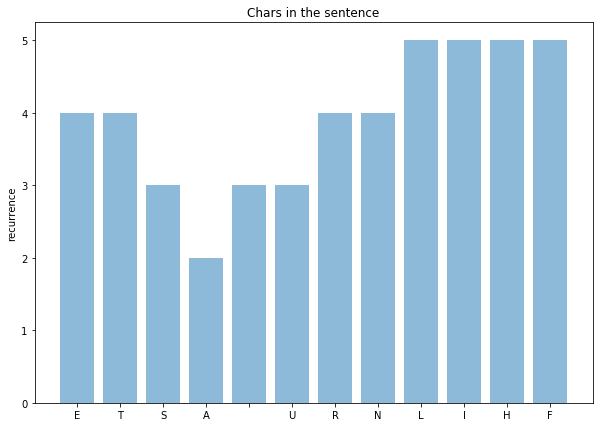

In [141]:
sh.plot_bar()

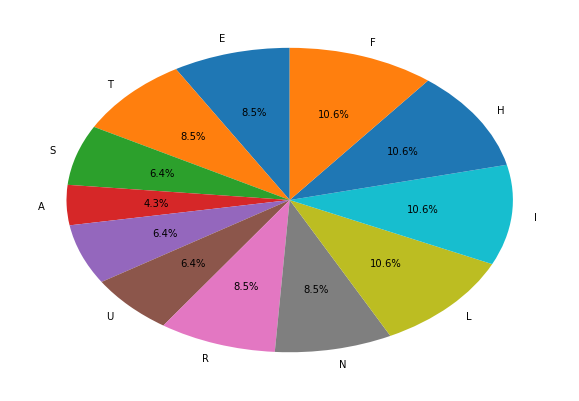

In [142]:
sh.plot_pie()